In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'

# Sub Rutas iluminacion + camara
c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug'

mm = [m1, m2, m3, m4, m5]
ii = [i1, i2, i3, i4]

In [5]:
def filtro_disco(url):
    cn1 = cv2.imread(url)[:,:,0]
    cn2 = cv2.imread(url)[:,:,1]
    cn3 = cv2.imread(url)[:,:,2]
    res = (cn1+cn2+cn3)/3
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                res[i,j] = 0    
    return res

def filtro_anillo(url):
    cn1 = cv2.imread(url)[:,:,0]
    cn2 = cv2.imread(url)[:,:,1]
    cn3 = cv2.imread(url)[:,:,2]
    res = (cn1+cn2+cn3)/3
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                res[i,j] = 0   
    return res

def filtro_placa(url):
    cn1 = cv2.imread(url)[:,:,0]
    cn2 = cv2.imread(url)[:,:,1]
    cn3 = cv2.imread(url)[:,:,2]
    res = (cn1+cn2+cn3)/3
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                res[i,j] = 0   
    return res

def filtro_viga(url):
    cn1 = cv2.imread(url)[:,:,0]
    cn2 = cv2.imread(url)[:,:,1]
    cn3 = cv2.imread(url)[:,:,2]
    res = (cn1+cn2+cn3)/3
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                res[i,j] = 0   
    return res

def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)

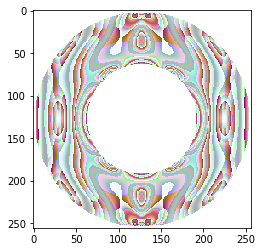

In [22]:
## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
m =  base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
c = 'LCD_Ojo_Humano_No_correccion/'

b1 = get_filtro(m, m + c + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + c + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + c + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + c + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

a1 = get_filtro(m, m + c + i1 + 'Img1_' + '99.bmp')    #Imagen 1
a2 = get_filtro(m, m + c + i2 + 'Img2_' + '99.bmp')    #Imagen 2
a3 = get_filtro(m, m + c + i3 + 'Img3_' + '99.bmp')    #Imagen 3
a4 = get_filtro(m, m + c + i4 + 'Img4_' + '99.bmp')    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                # Normalización por valor máximo

plt.imshow(a5, cmap='gray')

In [7]:
np.max(a5)

1.0

In [8]:
a5.shape

(256, 256, 4)

In [4]:
m2+c2+i1+'Img1_100.bmp'

'Secuencias/Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/LCD_DCC3260C_No_correccion/Img_1/Img1_100.bmp'

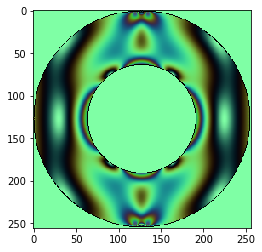

In [6]:
img1 = cv2.imread(m2+c2+i1+'Img1_100.bmp')
plt.imshow(img1)

In [8]:
img1.shape

(256, 256, 3)

In [9]:
cn1 = img1[:,:,0]
cn2 = img1[:,:,1]
cn3 = img1[:,:,2]

res = (cn1+cn2+cn3)/3

In [10]:
res.shape

(256, 256)

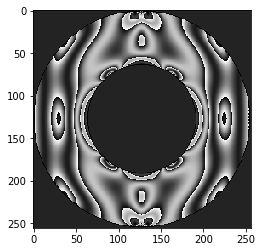

In [13]:
plt.imshow(res, cmap='gray')

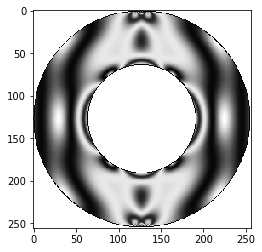

In [16]:
plt.imshow(cn3, cmap='gray')